<IPython.core.display.Javascript object>


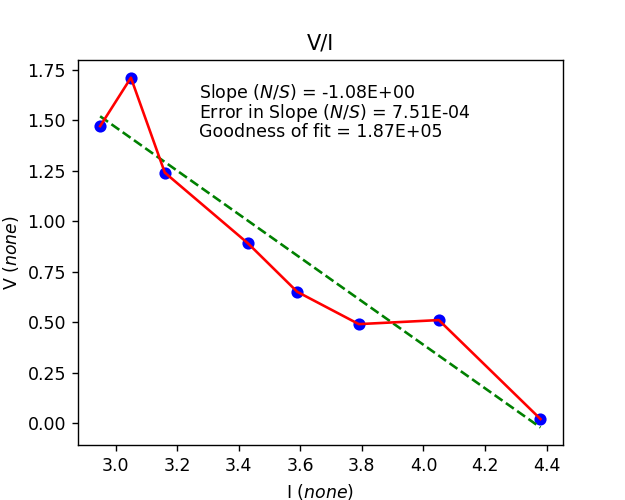

In [1]:
#Plotting
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
#Re-assign variables as x, y, dy so that the following code may remain generic
x = np.array([2.95,3.05,3.16,3.43,3.59,3.79,4.05,4.38])
y = np.array([1.47,1.71,1.24,.89,.65,.49,.51,.02])
dy = np.array([.001,.001,.001,.001,.001,.001,.001,.001])
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)
#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x
#Calculate the error in slope and intercept (you do not need to understand how these are calculated). 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
    
D=Delta(x, dy)
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept
#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(5,4))
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
#create labels  
plt.xlabel('I ($none$)')
plt.ylabel('V ($none$)')
plt.title('V/I')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="r") #don't need to plot x error bars
 
plt.annotate('Slope ($N$/$S$) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.25, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope ($N$/$S$) = {value:.{digits}E}'.format(value=dm, digits=2),
             (0.25, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.25, 0.80), xycoords='axes fraction')

plt.show()

In [2]:
timeit (Delta)


66.2 ns ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


<IPython.core.display.Javascript object>


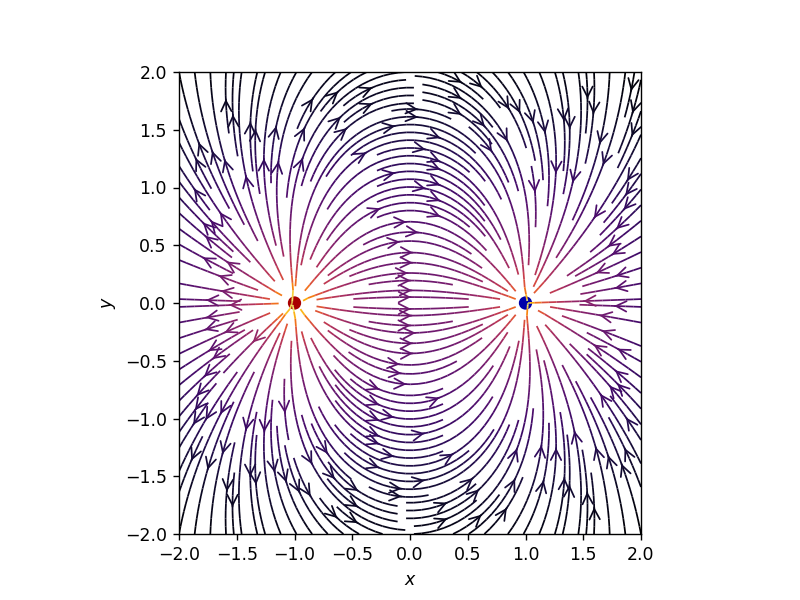

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

# Grid of x, y points
nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

# Create a multipole with nq charges of alternating sign, equally spaced
# on the unit circle.

try:
    nq = 2**int(sys.argv[1])
    int('')
except ValueError:
    pass
charges = []
nq=2
for i in range(nq):
    q = i%2 * 2 - 1
    charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))

ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()

In [31]:
from sympy.physics.vector import curl
curl()
